We are going to analyize data of houses sold in King County (US-WA). The goal is to build a Deep Learning model to predict the price of a new house based off the given features.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../DATA/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

df.isnull() is a boolean dataframe; then .sum() sums all the columns taking False=0 and True=1. So there are no missing data, which is good.

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


/Users/GiovanniDomenico/miniforge3/envs/TFTEST/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

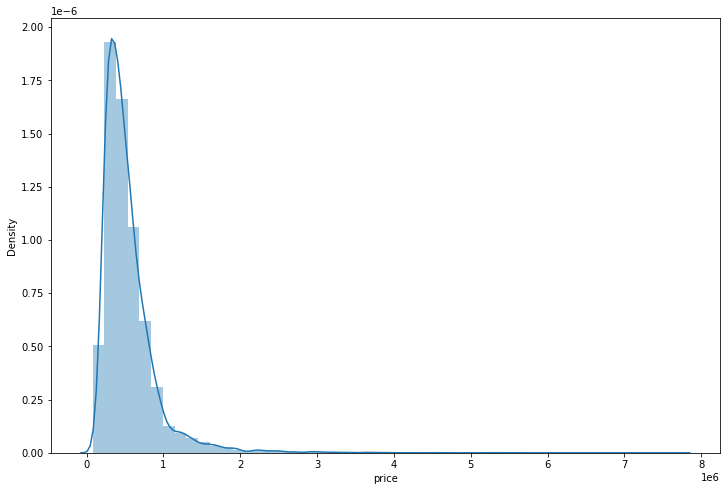

In [6]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

We see that most of the houses have price less than $3$mln$. It may happen that houses with higher price are so rare that can be just a noise; NOT dropping them from the dataset could negatively affect the final model in terms of accuracy. For the moment we ain't drop nothing and let's see how thing will go.

/Users/GiovanniDomenico/miniforge3/envs/TFTEST/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

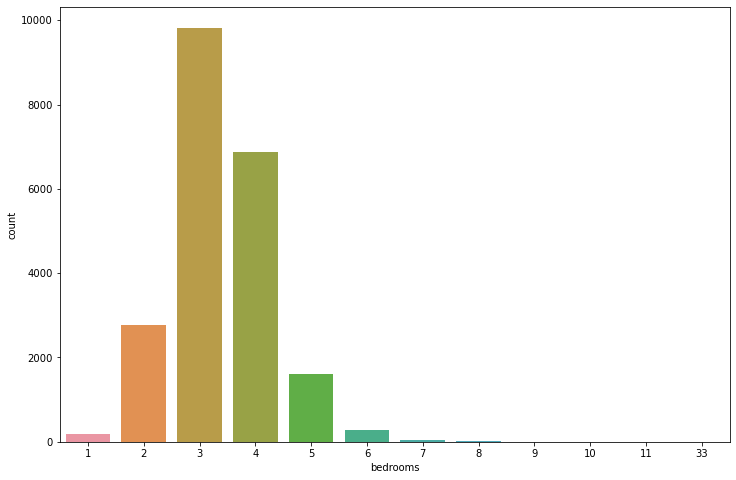

In [7]:
plt.figure(figsize=(12,8))

sns.countplot(df['bedrooms'])

Since our label is the price, let's look at the correlation between the label and the other features:

In [8]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

So the highest correlated feature is the square feet living.

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

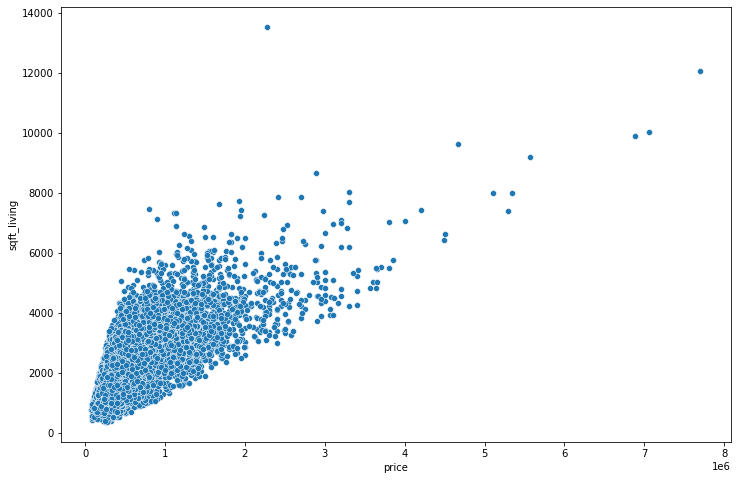

In [9]:
plt.figure(figsize=(12,8))

sns.scatterplot(x=df['price'],y=df['sqft_living'])

Let see now the distribution of the bedrooms wrt price:

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

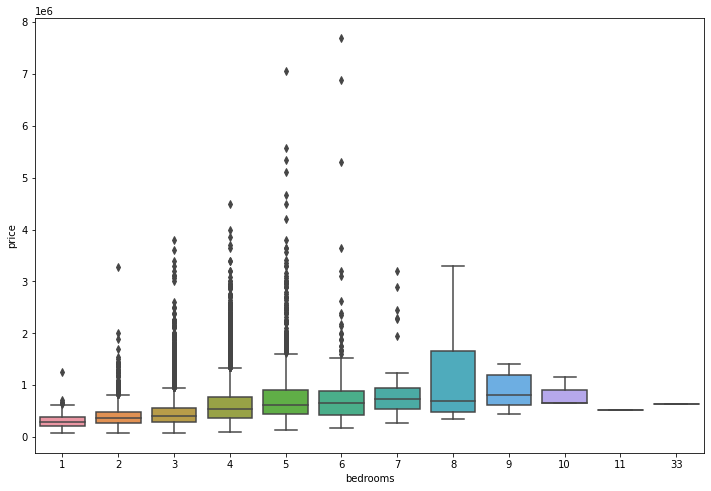

In [10]:
plt.figure(figsize=(12,8))

sns.boxplot(x=df['bedrooms'],y=df['price'])

The first information I get is the high number of outliers, which suggest it may worth it to drop the most luxurious houses.

Let's look now at some geographical properties. We could use Choropleth to get a geographical plotting; but let's go for something more sober for the moment. 

<AxesSubplot:xlabel='price', ylabel='lat'>

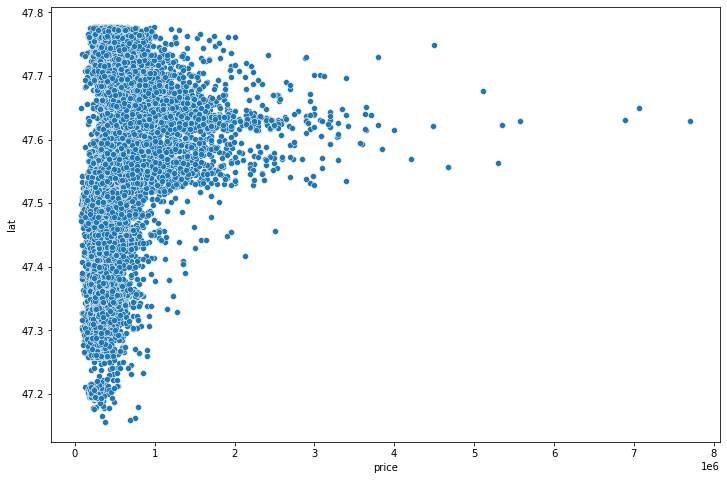

In [11]:
plt.figure(figsize=(12,8))

sns.scatterplot(x=df['price'],y=df['lat'])

<AxesSubplot:xlabel='price', ylabel='long'>

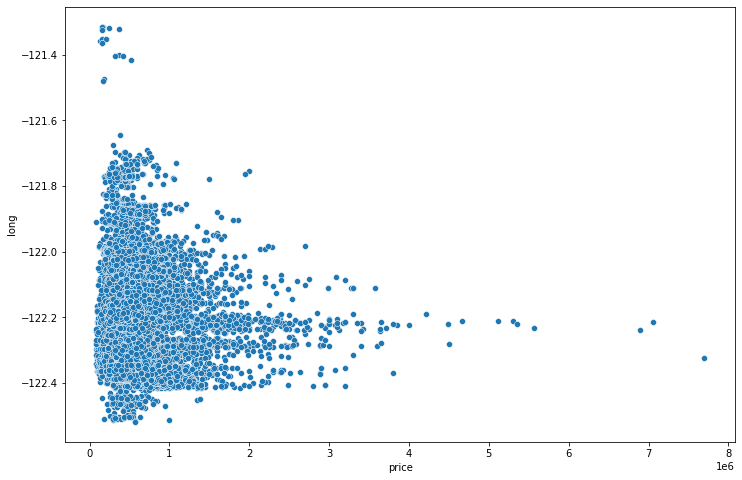

In [12]:
plt.figure(figsize=(12,8))

sns.scatterplot(x=df['price'],y=df['long'])

So it seems that the most expansive houses have longitude $\approx -122.2$ and latitude $\approx 46.65$. Let's check this in a clearer way:

<AxesSubplot:xlabel='long', ylabel='lat'>

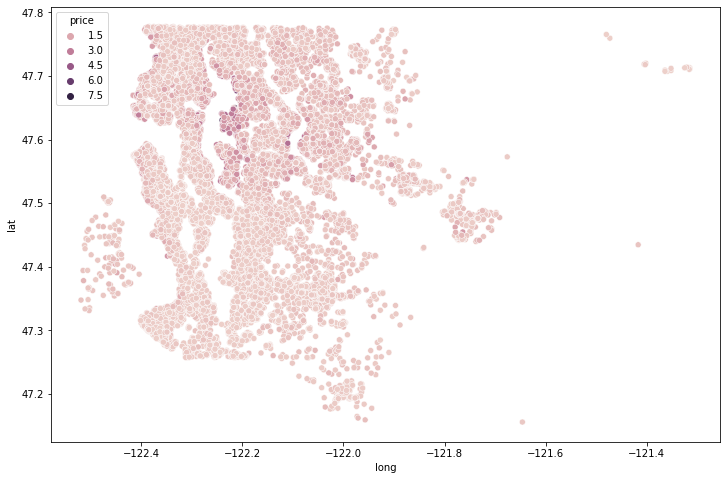

In [13]:
plt.figure(figsize=(12,8))

sns.scatterplot(x=df['long'],y=df['lat'],hue=df['price'])

...and looking carefully, yes, we there is some darker point in the aforementioned coordinates, but still it's too homogeneous, not easily readable. Again, dropping the expansive houses would make the colour more sensitive with respect the lower prices.

In [14]:
from PIL import Image
import requests

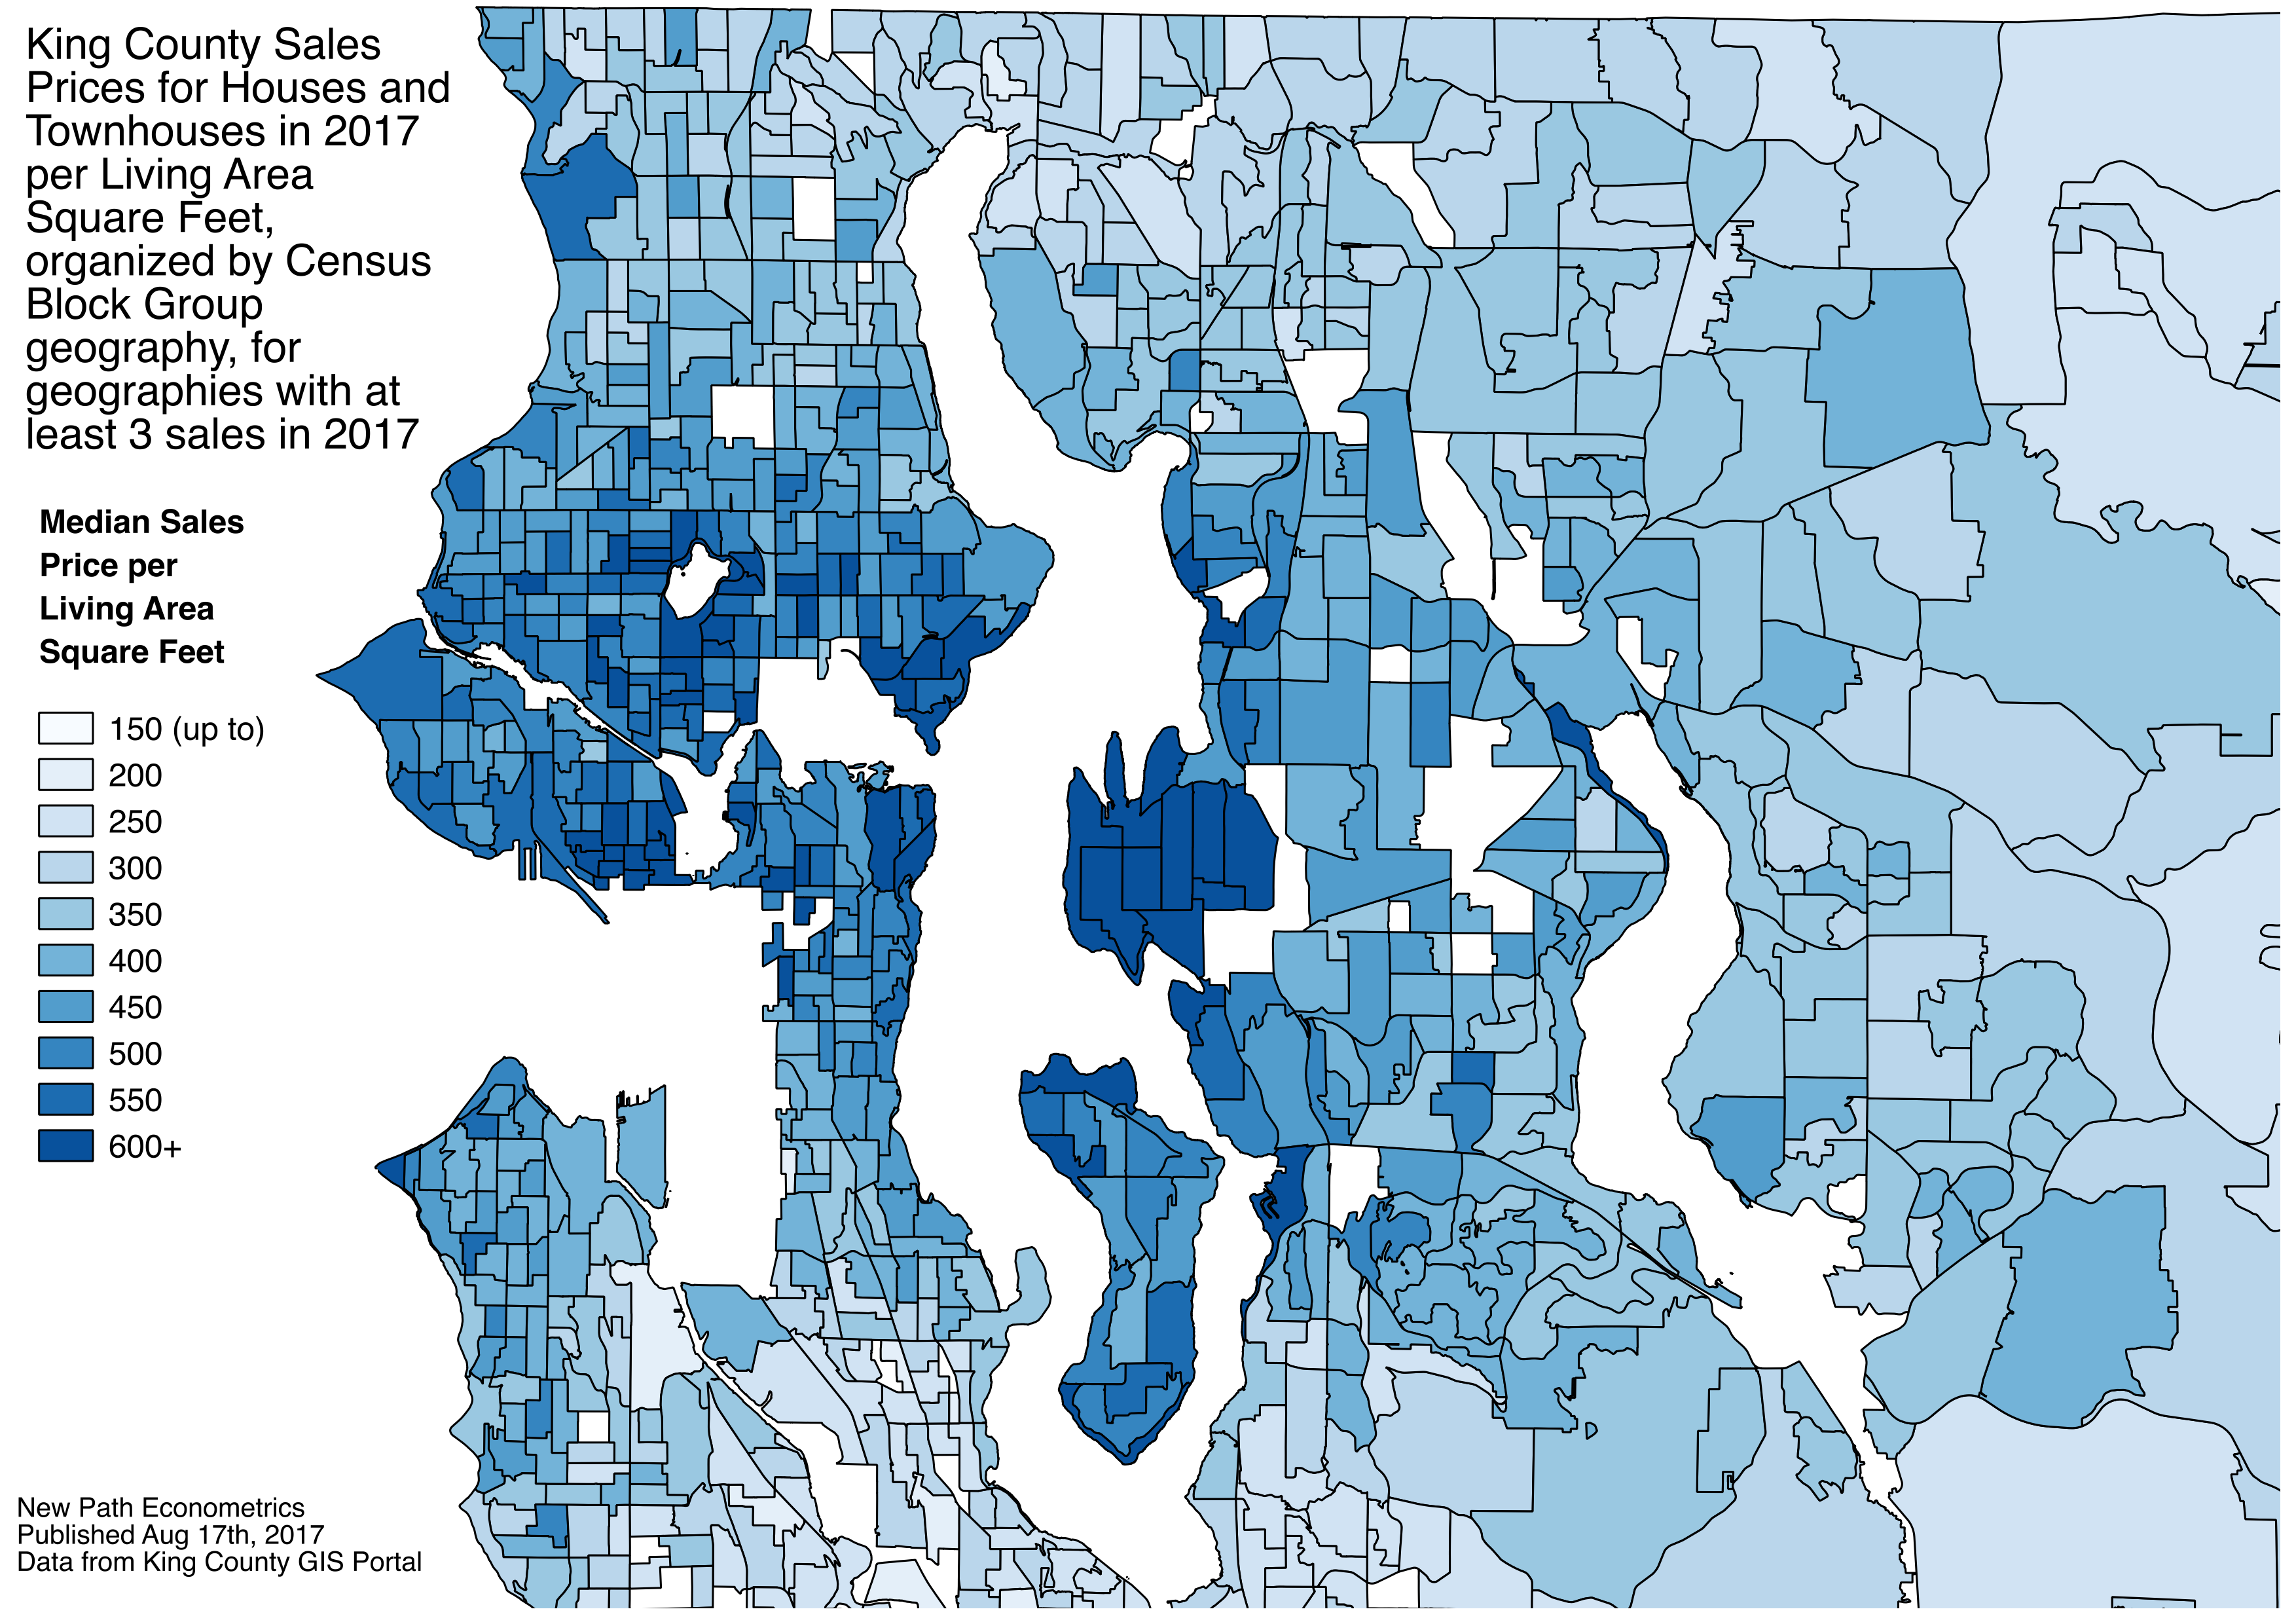

In [15]:
Image.open(requests.get('https://external-preview.redd.it/fZmGYFgau-vYmtLOixJRvrwMsM3W6_np7T-6qVI29mI.png?auto=webp&s=4b8745b92c2ec89a7a0660c212ed4626dfc59fcd' , stream=True).raw)

So we can see that the area highlighted by our scatterplot actually draws the geographical area.+

Let's check the prices a bit better:

In [16]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


We actually see that less than 20 houses, out of

In [17]:
len(df['price'])

21597

cost more than $3$mln$. So we can drop the top 1% most expansive houses :

In [18]:
len(df['price'])*0.01

215.97

In [19]:
non_top_1_perc = df.sort_values('price',ascending=False)[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

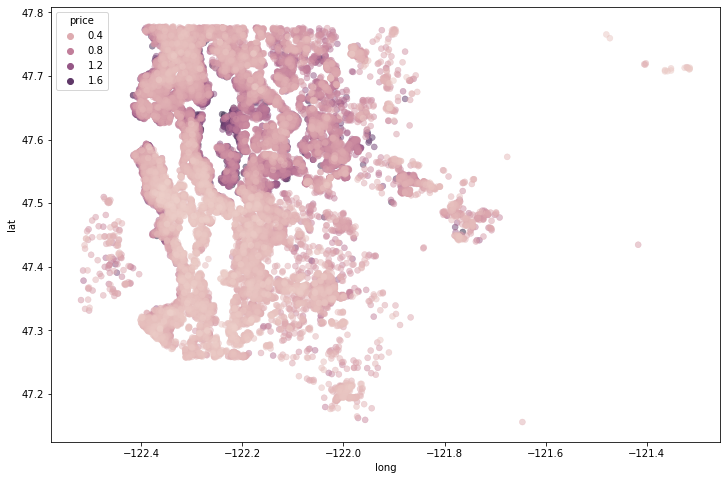

In [20]:
plt.figure(figsize=(12,8))

sns.scatterplot(x='long',y='lat',data=non_top_1_perc,hue='price',alpha=0.5,edgecolor=None)

Now it's a bit clearer where the expensive houses are.

The feature *waterfront* is a dummy variable expressing whether the house is overlooking the waterfront or not.

<AxesSubplot:xlabel='waterfront', ylabel='price'>

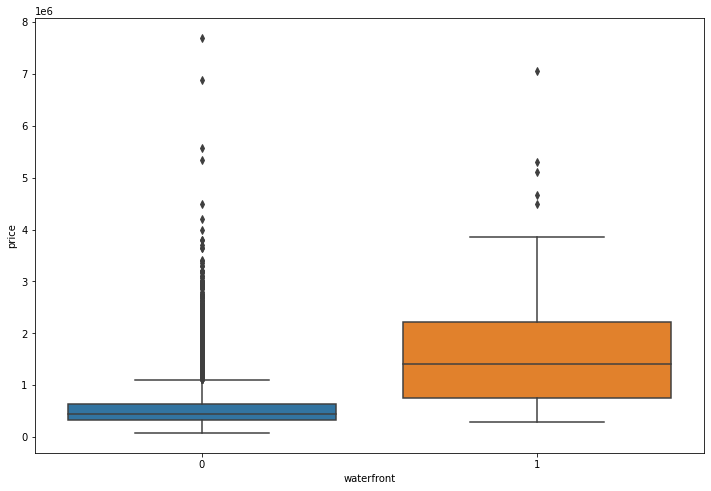

In [21]:
plt.figure(figsize=(12,8))


sns.boxplot(x=df['waterfront'] , y=df['price'])

Trivially the house close to the water are more expansive; let's represent the mean values of the houses split off this feature:

In [22]:
df2 = df.groupby('waterfront').mean()['price']

In [23]:
len(df2)

2

<AxesSubplot:ylabel='price'>

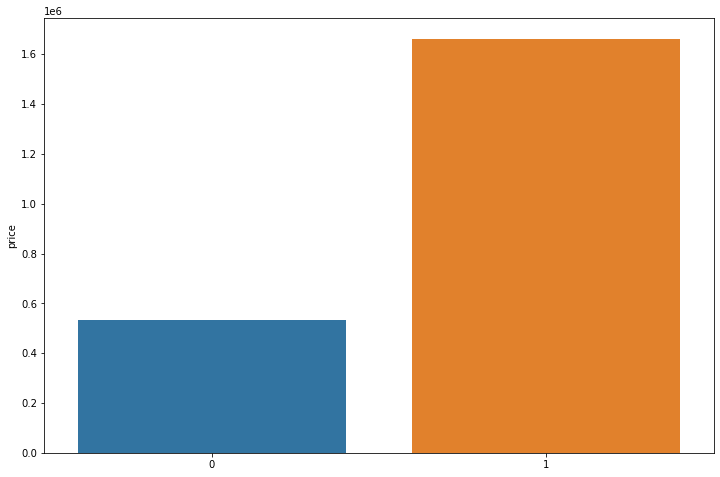

In [24]:
plt.figure(figsize=(12,8))


sns.barplot(x=np.arange(len(df2)),y=df2)

So let's do some feature engineering, meaning we try to find a way to create new features hidden in the already existing ones and cleaning the data by removing features which don't really give relevant or useful info.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [26]:
df = df.drop('id',axis=1)

In [27]:
type(df['date'][0])

str

Hence data are strings, so we need to turn them into a more convenient format:

In [28]:
df['date'] = pd.to_datetime(df['date'])

In [29]:
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [30]:
df['month'] = df['date'].apply(lambda date:date.month)

In [31]:
df['year'] = df['date'].apply(lambda date:date.year)

In [32]:
df = df.drop('date',axis=1)

In [33]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


<AxesSubplot:xlabel='month', ylabel='price'>

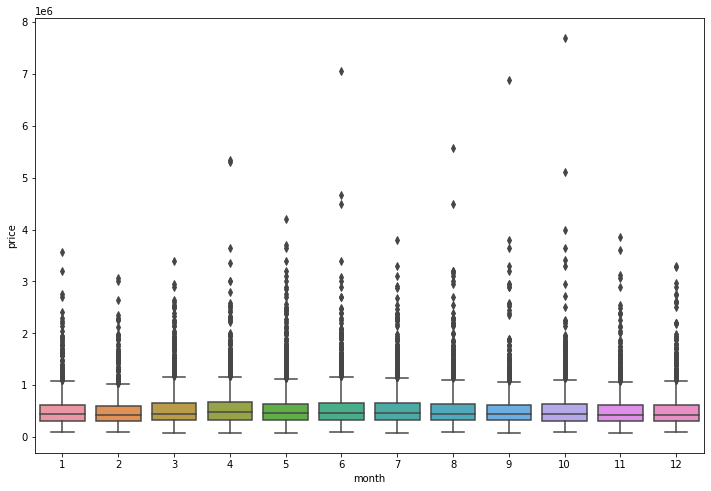

In [34]:
plt.figure(figsize=(12,8))

sns.boxplot(x=df['month'], y=df['price'])

<AxesSubplot:xlabel='year', ylabel='price'>

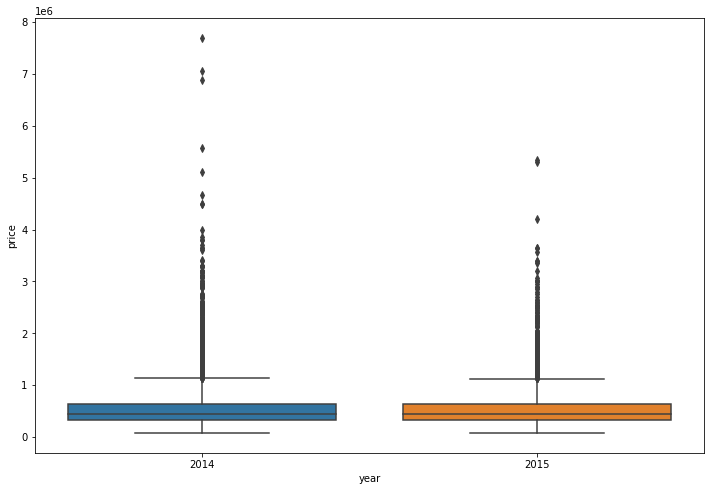

In [35]:
plt.figure(figsize=(12,8))

sns.boxplot(x=df['year'], y=df['price'])

So, not useful info so far. But keep going:

<AxesSubplot:xlabel='month'>

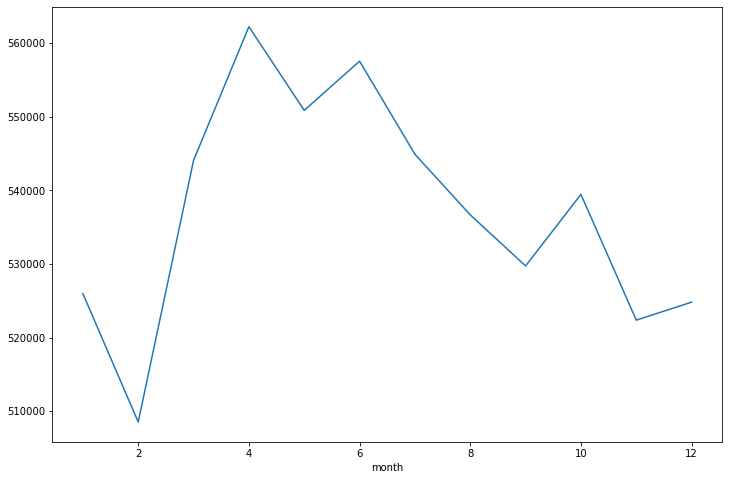

In [36]:
plt.figure(figsize=(12,8))


df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

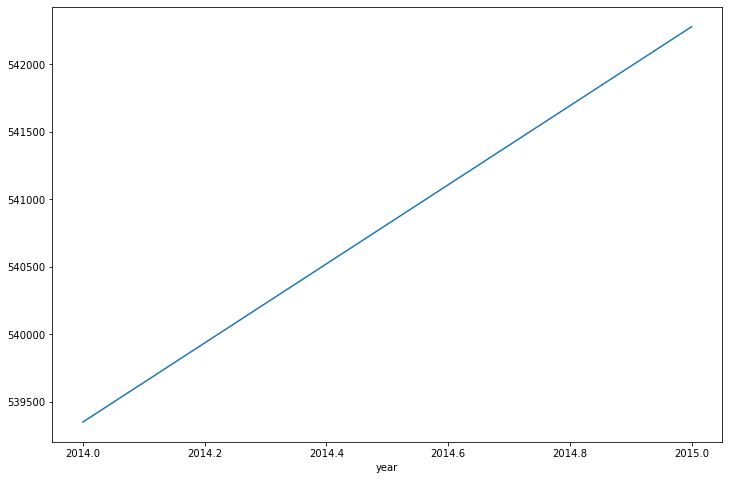

In [37]:
plt.figure(figsize=(12,8))


df.groupby('year').mean()['price'].plot()

So we can see that the average price increased from 2014 to 2015, but the difference is:

In [38]:
a = df[df['year']==2015]['price'].mean()-df[df['year']==2014]['price'].mean()

In [39]:
b=df['price'].mean()

In [40]:
c=(a/b)*100

In [41]:
print('The average price of the houses increased from 2014 to 2015 of {}%'.format(c))

The average price of the houses increased from 2014 to 2015 of 0.5419420083239205%


Let's proceed with feature engineering and look at zip codes:

In [42]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

Hence there are 70 different zip codes: too many to consider them as categorical variables.

We could separate the houses by price range (low/mid/high) or by geographical position (N/S/W/E), but this would take time and domain knowledge.

Take a look now to the feature *yr_renovated*; year 0 means that the house has never been renovated:

In [43]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2007       35
        ...  
1948        1
1954        1
1951        1
1944        1
1959        1
Name: yr_renovated, Length: 70, dtype: int64

Probably it would make sense just to turn this feature into a dummy variable, setting 1 if the house has been renovated and 0 otherwise:

In [44]:
def ren(year):
    if year==0:
        return 0
    else:
        return 1

In [45]:
df['renovated']=df['yr_renovated'].apply(ren)

In [46]:
df = df.drop('yr_renovated',axis=1)

In [47]:
df3 = df.groupby('renovated').mean()['price']

In [48]:
df3

renovated
0    530559.899193
1    760628.777899
Name: price, dtype: float64

<AxesSubplot:ylabel='price'>

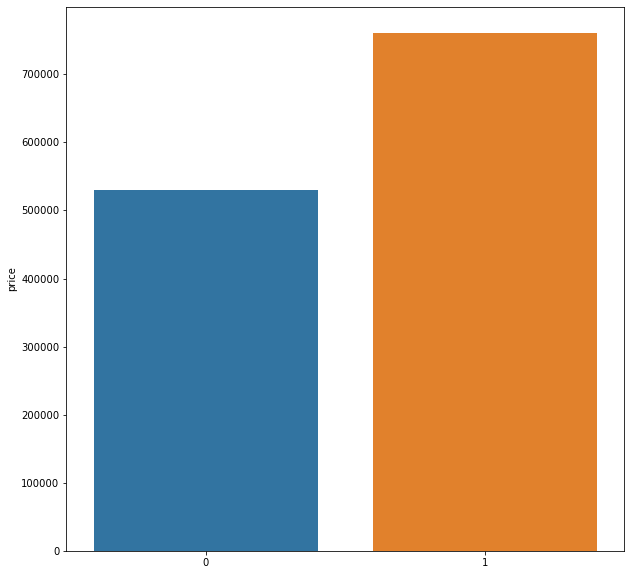

In [49]:
plt.figure(figsize=(10,10))

sns.barplot(x=np.arange(len(df3)),y=df3)

So, houses renovated have higher price; sounds reasonable.

Same procedure with the feature *sqft_basement*:

In [50]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
65          1
1248        1
172         1
1920        1
1135        1
Name: sqft_basement, Length: 306, dtype: int64

In [51]:
df['basement'] = df['sqft_basement'].apply(ren)

In [52]:
df = df.drop('sqft_basement',axis=1)

We can see the average price of the houses with and without basement, even if it will be likely less meaningful than the price of house renovated/not ren.

<AxesSubplot:xlabel='basement', ylabel='price'>

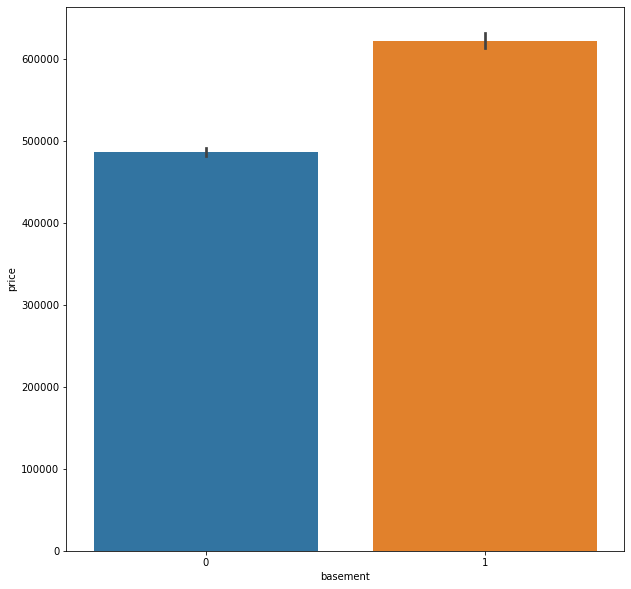

In [53]:
plt.figure(figsize=(10,10))

sns.barplot(x=df['basement'],y=df['price'])  #barplot compute the average by default, so above I could have avoided to compute it!

Again, makes sense the fact that houses with basement cost $\approx$100K$ more.

Let's create now an ANN to predict the price of houses.

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler = MinMaxScaler()

In [59]:
X_train = scaler.fit_transform(X_train)

In [60]:
X_test = scaler.transform(X_test)

In [61]:
X_train.shape

(15117, 20)

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [63]:
model = Sequential()

model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='Adam',loss='mse')

Just a couple of words: later on we will focus on improving the model by acting on the number of layers, of epochs and of neurons.

For the moment we will fit the model exploiting two additional parameters:

$\bullet$ *validation_data*: takes into account the test set (beside the training set) without modifying anything in the fitting process (in particular W/B are not touched); it is exploited just to test the model at the end of each epoch: in this way, beside taking track of the loss through mse between the training set and the label set at the end of each epoch, the same is done with test set and labels; in this way we will be able to control the evolution of the accuracy of the model. It may happen that, in a $400$-epochs fitting, the minimal loss occurs after just a hundred, so it makes no sense to go further, neither in terms of time, nor (and especially) in terms of precision of the model.

$\bullet$ *batch_size*: we can divide each epoch in batches of a fixed size, which will be considered as subsets on which the model will train *independently* at each epoch.
Clearly, small batch sizes imply more batches at each epoch, thus higher chances to have a lot of sub-training sets with low correlation. This clearly fights overfitting, so the number of epochs can be somehow high, but since the model trains on small sets, the accuracy could be not optimal. Morover, having a lot of batches to check, the model will be not the fastest.
On the other hand, big batch sizes create the opposite situation: we can overfit sooner but the accuracy will be higher, as well as the model will be faster. Typically one sets the batch_size as a power of $2$.

In [64]:
model.fit(x=X_train,y=y_train,
         validation_data=(X_test,y_test),
         batch_size=128,
         epochs=400,
         verbose=0)

In [65]:
d=model.history.history

This dictionary has now two keys: one for the model losses, and one for the validation losses. Let's compare them.

In [66]:
losses = pd.DataFrame(d)

<AxesSubplot:>

<Figure size 1008x720 with 0 Axes>

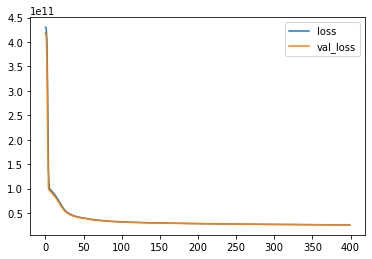

In [67]:
plt.figure(figsize=(14,10))

losses.plot()

The curves have the same behavior. In particular there is no overfitting, so we could have used a number of epochs even higher.

Let's evaluate now our data.

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

*explained_variance_score* is a parameter which expresses the discrepancy between the model and the given data. It's a value $\in[0,1]$, where $1$ means the model predicts the actual data perfectly; the lower this number, the worse the model.

In [69]:
pred = model.predict(X_test)

In [70]:
type(pred)

numpy.ndarray

In [71]:
RMSE = mean_squared_error(pred,y_test)**0.5

In [72]:
MAE = mean_absolute_error(pred,y_test)

In [73]:
print('Root mse is {}'.format(RMSE))

print('Mae is {}'.format(MAE))

Root mse is 159828.52701944095
Mae is 99108.24256908275


In [74]:
m = df['price'].mean()

In [75]:
a=(MAE/m)*100

In [76]:
print('The mean absolute error is of {}%.'.format(a))

The mean absolute error is of 18.343303923999304%.


Well, an error of almost $20$% is not negligible, but neither terrible, though. This is reflected in the explained variance score:

In [77]:
explained_variance_score(pred,y_test)

0.7761388233438197

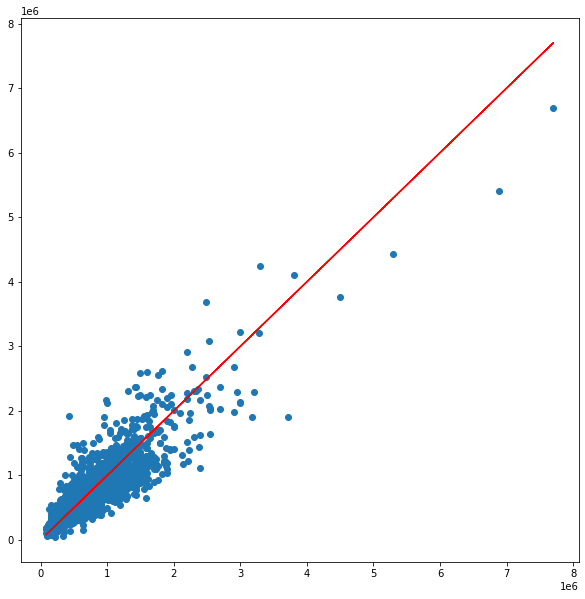

In [78]:
plt.figure(figsize=(10,10))
plt.scatter(x=y_test,y=pred)
plt.plot(y_test,y_test,c='r')

We see again that expansive houses are out of track and being expansive they produce some "noise" in the model.

In [79]:
y_test.shape

(6480,)

In [80]:
pred.shape

(6480, 1)

In [81]:
y_test = y_test.reshape(6480,1)

/Users/GiovanniDomenico/miniforge3/envs/TFTEST/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

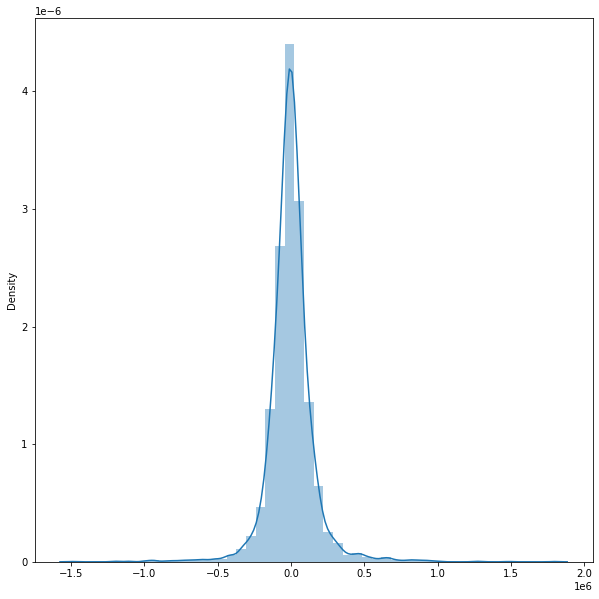

In [82]:
plt.figure(figsize=(10,10))
sns.distplot(y_test-pred)

Let's make now a prediction on a "new" house.

In [83]:
new_house = df.drop('price',axis=1).iloc[0]

In [84]:
type(new_house)

pandas.core.series.Series

In [85]:
new_house = new_house.values

In [86]:
new_house = new_house.reshape(1,20)

In [87]:
new_house = scaler.transform(new_house)

In [88]:
z=model.predict(new_house)

In [89]:
w=df.iloc[0]['price']

In [90]:
r=abs(z[0][0]-w)

In [91]:
(r/m)*100

9.787142162850294

That is, an error of less than 7%. Worth it to repeat with the non_top_1_perc dataset

In [92]:
nt1p = df.sort_values('price',ascending=False)[216:]

In [93]:
X = nt1p.drop('price',axis=1).values
y = nt1p['price'].values

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [95]:
X_train = scaler.fit_transform(X_train)

In [96]:
X_test = scaler.transform(X_test)

In [97]:
model = Sequential()

model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='Adam',loss='mse')

In [98]:
model.fit(x=X_train,y=y_train,
         validation_data=(X_test,y_test),
         batch_size=128,
         epochs=700,
         verbose=0)

In [99]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

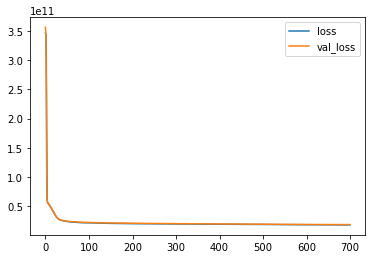

In [100]:
losses.plot()

In [101]:
pred = model.predict(X_test)

In [102]:
RMSE = mean_squared_error(pred,y_test)**0.5
MAE = mean_absolute_error(pred,y_test)

In [103]:
print('Root mse is {}'.format(RMSE))

print('Mae is {}'.format(MAE))

Root mse is 134350.63874001897
Mae is 90651.12368106976


In [104]:
m = nt1p['price'].mean()
a=(MAE/m)*100

In [105]:
print('The mean absolute error is of {}%.'.format(a))

The mean absolute error is of 17.487810696507267%.


In [106]:
explained_variance_score(pred,y_test)

0.7260705513292363

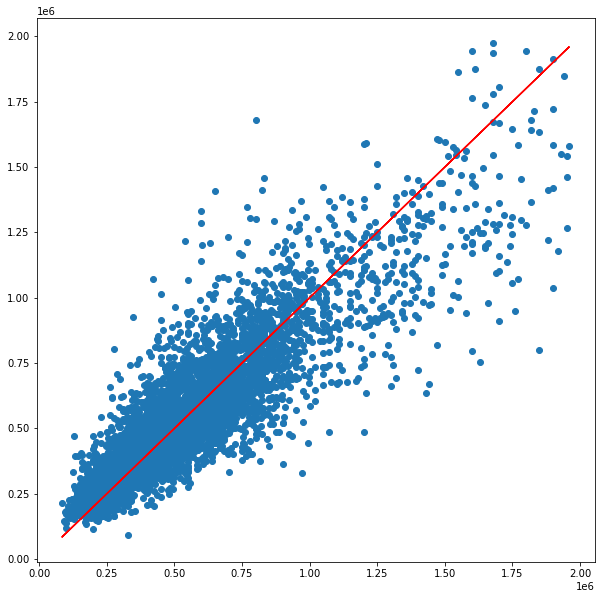

In [107]:
plt.figure(figsize=(10,10))
plt.scatter(x=y_test,y=pred)
plt.plot(y_test,y_test,c='r')

/Users/GiovanniDomenico/miniforge3/envs/TFTEST/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

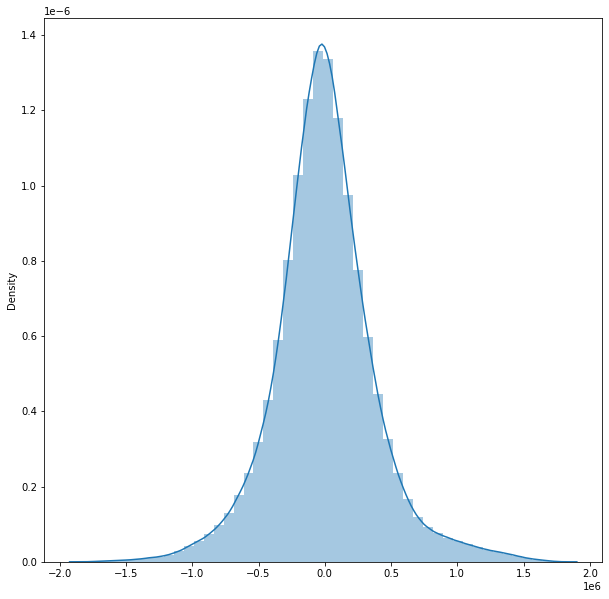

In [108]:
plt.figure(figsize=(10,10))
sns.distplot(y_test-pred)

In [109]:
new_house = nt1p.drop('price',axis=1).iloc[0]

In [110]:
new_house = new_house.values

In [111]:
new_house = new_house.reshape(1,20)

In [112]:
new_house = scaler.transform(new_house)

In [113]:
z=model.predict(new_house)
w=df.iloc[0]['price']
r=abs(z[0][0]-w)

In [114]:
(r/m)*100

200.03731218638669

Not a meaningful improvement in the model, even though we increased the epoch up to 700 and we dropped the 1% most expansive houses. In particular the mae decreased from $18.71$% to $14,60$%.

Looking at the scatterplot, it could make sense to run the model once again for houses below $1$mln$

In [115]:
cheap = df[df['price']<1000000]

In [116]:
X = cheap.drop('price',axis=1).values
y = cheap['price'].values

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [118]:
X_train = scaler.fit_transform(X_train)

In [119]:
X_test = scaler.transform(X_test)

In [120]:
model = Sequential()

model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='Adam',loss='mse')

In [121]:
model.fit(x=X_train,y=y_train,
         validation_data=(X_test,y_test),
         batch_size=128,
         epochs=700,
         verbose=0)

In [122]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

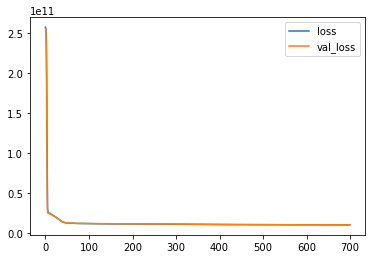

In [123]:
losses.plot()

In [124]:
pred = model.predict(X_test)

In [125]:
RMSE = mean_squared_error(pred,y_test)**0.5
MAE = mean_absolute_error(pred,y_test)

In [126]:
print('Root mse is {}'.format(RMSE))

print('Mae is {}'.format(MAE))

Root mse is 101030.13779338822
Mae is 75260.89899174334


In [127]:
m = cheap['price'].mean()
a=(MAE/m)*100

In [138]:
print('The mean absolute error is of {}% of the average price.'.format(a))

The mean absolute error is of 16.11154132847631% of the average price.


In [129]:
explained_variance_score(pred,y_test)

0.6368410901312249

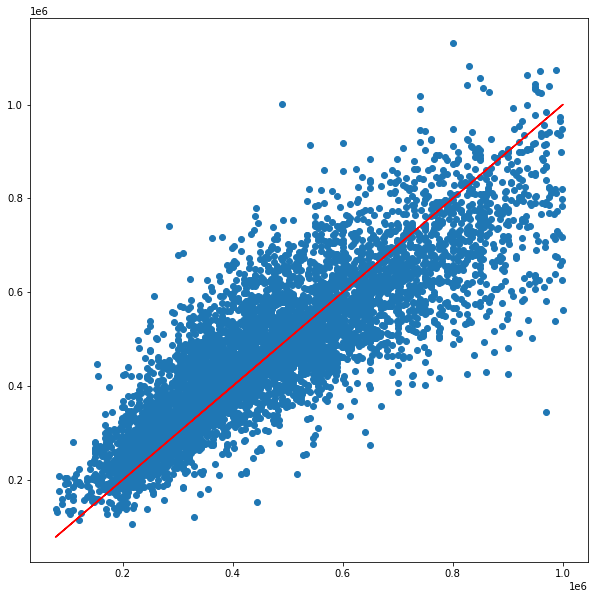

In [130]:
plt.figure(figsize=(10,10))
plt.scatter(x=y_test,y=pred)
plt.plot(y_test,y_test,c='r')

/Users/GiovanniDomenico/miniforge3/envs/TFTEST/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

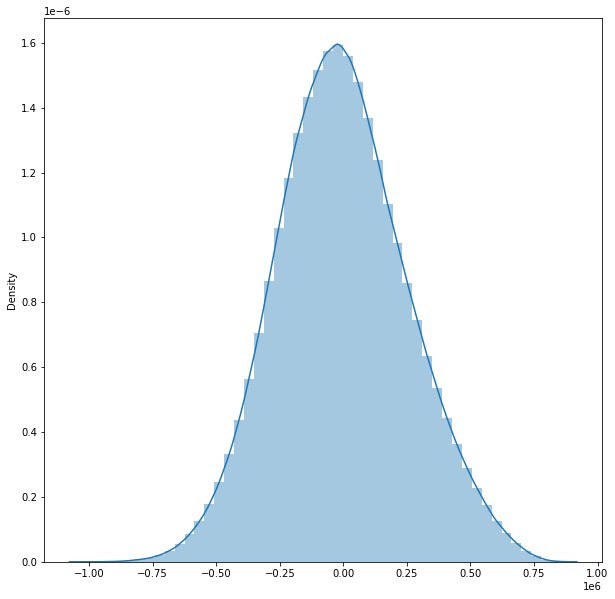

In [131]:
plt.figure(figsize=(10,10))
sns.distplot(y_test-pred)

In [132]:
new_house = cheap.drop('price',axis=1).iloc[0]

In [133]:
new_house = new_house.values

In [134]:
new_house = new_house.reshape(1,20)

In [135]:
new_house = scaler.transform(new_house)

In [136]:
z=model.predict(new_house)
w=df.iloc[0]['price']
r=abs(z[0][0]-w)

In [137]:
(r/m)*100

6.412518485364139

Now the mae increased from 14,60 to 16,19. The second one was the best model among the three.